In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)

In [26]:
df = pd.read_csv("Telco Customer Churn.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

df = df.drop(columns=["customerID"])

print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


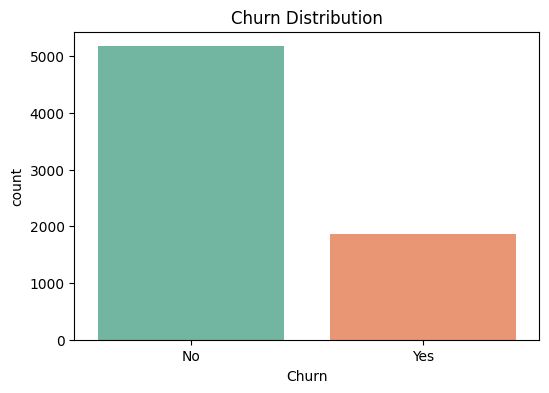


Churn Ratio:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", hue="Churn", data=df, palette="Set2", legend=False)
plt.title("Churn Distribution")
plt.show()

print("\nChurn Ratio:\n", df["Churn"].value_counts(normalize=True))

In [29]:
pivot_contract = pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100
print("Churn % by Contract:\n", pivot_contract)

Churn % by Contract:
 Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


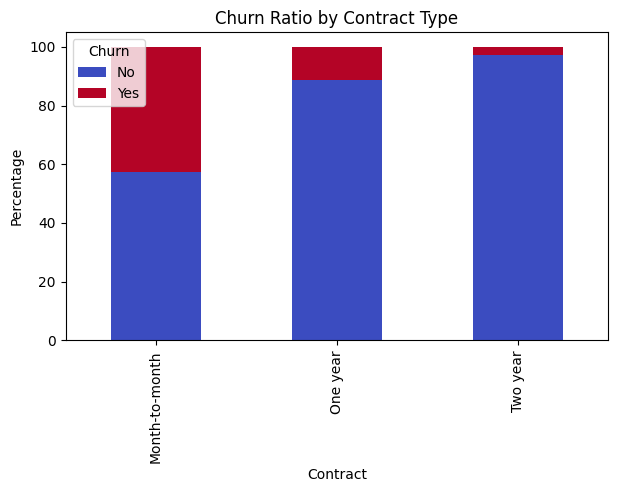

In [30]:
pivot_contract.plot(kind="bar", stacked=True, figsize=(7,4), colormap="coolwarm")
plt.title("Churn Ratio by Contract Type")
plt.ylabel("Percentage")
plt.show()

In [31]:
pivot_payment = pd.crosstab(df["PaymentMethod"], df["Churn"], normalize="index") * 100
print("\nChurn % by Payment Method:\n", pivot_payment)


Churn % by Payment Method:
 Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


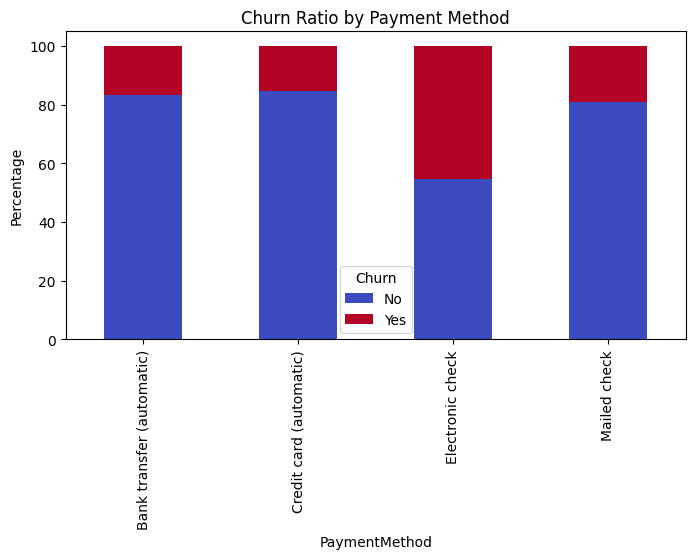

In [32]:
pivot_payment.plot(kind="bar", stacked=True, figsize=(8,4), colormap="coolwarm")
plt.title("Churn Ratio by Payment Method")
plt.ylabel("Percentage")
plt.show()

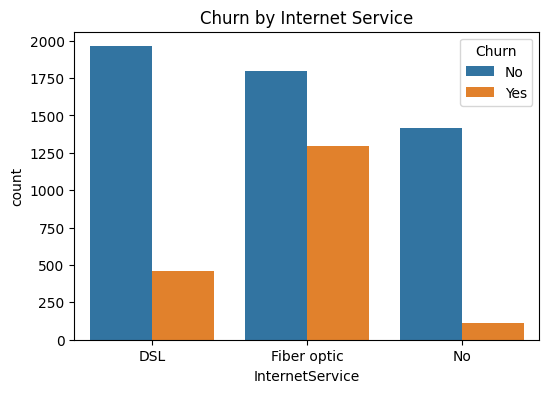

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service")
plt.show()

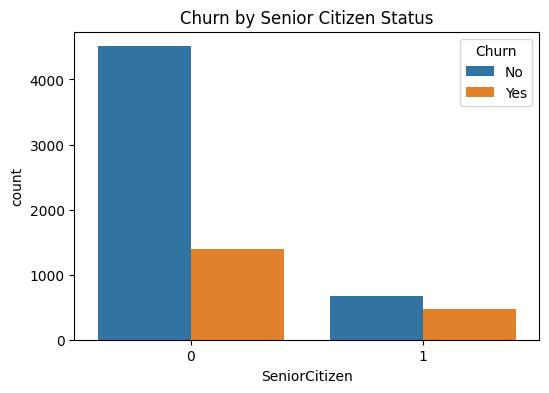

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Churn by Senior Citizen Status")
plt.show()

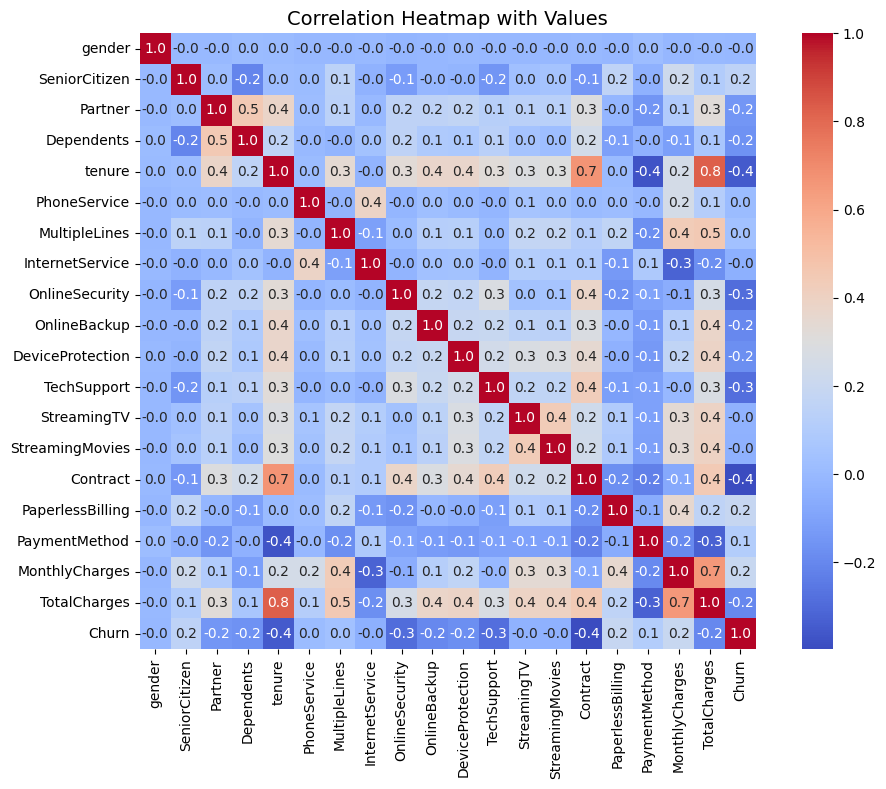

In [35]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap with Values", fontsize=14)
plt.show()

In [36]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

le = LabelEncoder()
for col in X.select_dtypes(include="object").columns:
    X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7991483321504613

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



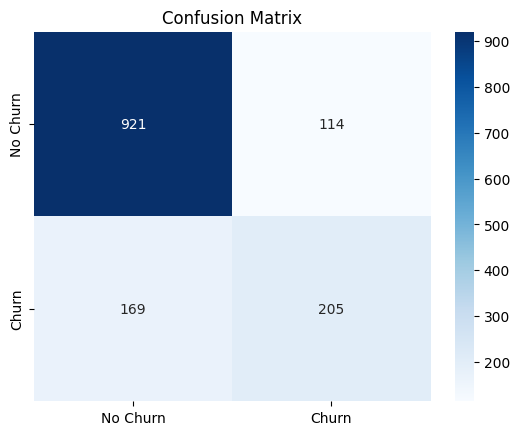

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Confusion Matrix")
plt.show()

In [40]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10]
}
grid = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7994305761535443


In [41]:
churn_counts = df["Churn"].value_counts(normalize=True)
p_yes = churn_counts["Yes"]
p_no = churn_counts["No"]

entropy = -(p_yes * np.log2(p_yes) + p_no * np.log2(p_no))
print("Entropy of Churn:", entropy)

Entropy of Churn: 0.8347419473972113


ROC AUC Score: 0.8402387041773232


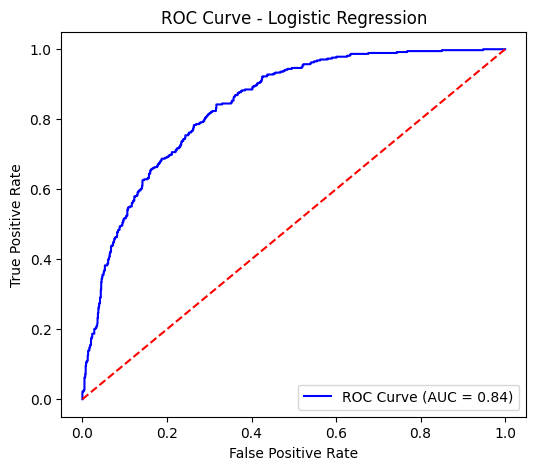

In [43]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()